# Introduction to Palmer Penguins
## A Vignette About the Data

The palmer penguins dataset comes from a paper about antarctic penguins.
The data was then packaged up into an R package for ease of use as a teaching example,
and later ported to Python. This data is colloquially referred to as the "palmer penguins" dataset. 

Here we use the pandas package to analyze and plotnine to visualize the data. 

# Setup

In [2]:
#| label: setup

import pandas as pd
import plotnine as p9

from plotnine import (aes, coord_flip, facet_wrap, geom_bar, geom_histogram,
                      geom_jitter, geom_point, ggplot, theme_minimal)

# Load Data

In [3]:
penguins = pd.read_csv("data/penguins_clean.csv")
penguins = penguins.dropna()

In [4]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [6]:
penguins.select_dtypes('object')

,species,island,sex
0,Adelie,Torgersen,male
1,Adelie,Torgersen,female
2,Adelie,Torgersen,female
4,Adelie,Torgersen,female
5,Adelie,Torgersen,male
...,...,...,...
339,Chinstrap,Dream,male
340,Chinstrap,Dream,female
341,Chinstrap,Dream,male
342,Chinstrap,Dream,male


# Summarize Data

In [7]:
(
  penguins
  .groupby(['species', 'island'])
  ['species']
  .agg('count')
)

species    island   
Adelie     Biscoe        44
           Dream         55
           Torgersen     47
Chinstrap  Dream         68
Gentoo     Biscoe       119
Name: species, dtype: int64

In [8]:
pd.crosstab(
  penguins['species'],
  penguins['island']
)

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0


# Data Visualization

Matplotlib is building the font cache; this may take a moment.


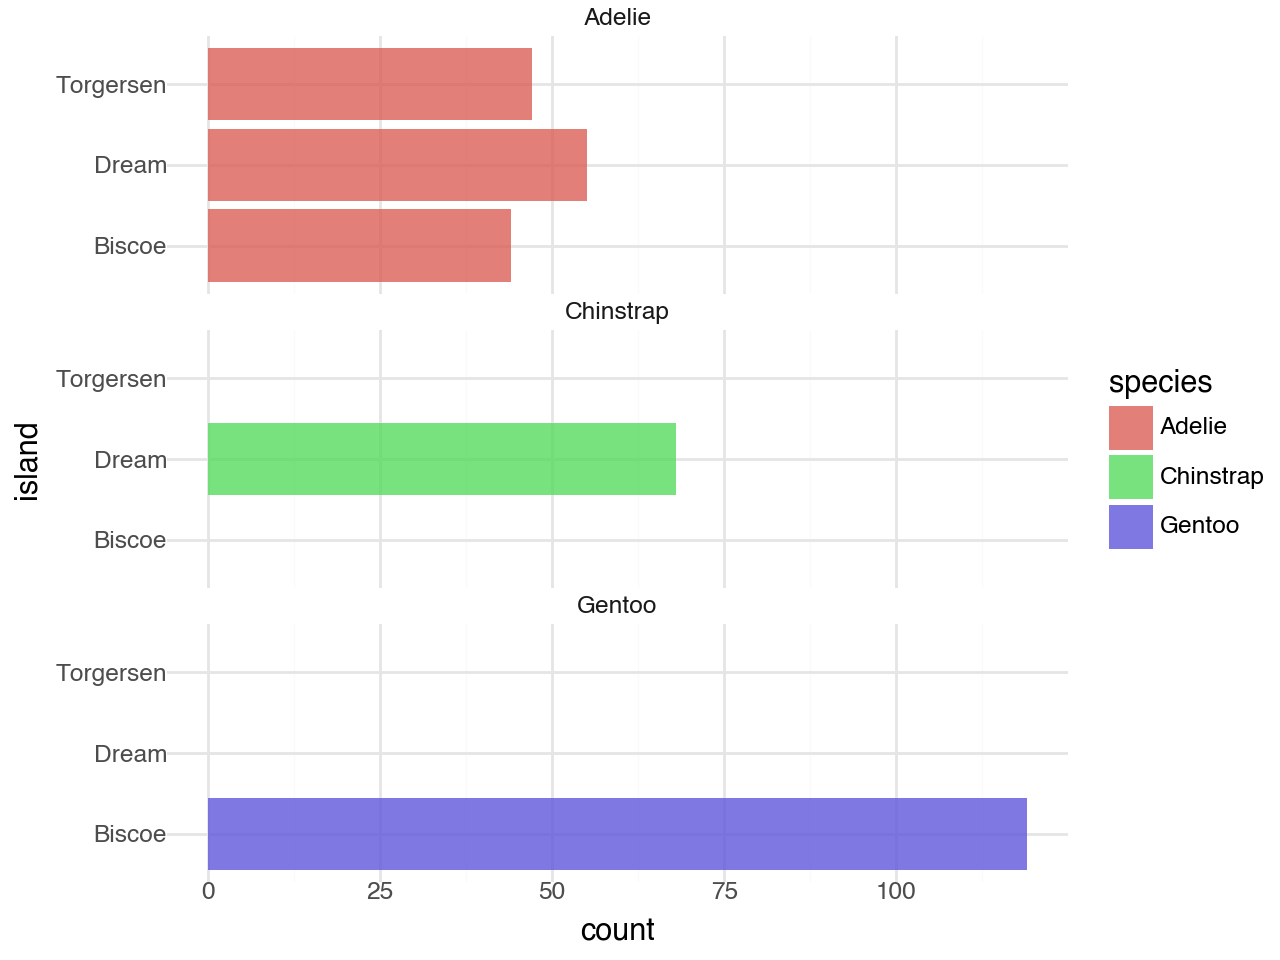

In [9]:
(
  ggplot(penguins, aes(x='island', fill='species')) +
  geom_bar(alpha = 0.8) +
  theme_minimal() +
  facet_wrap('species', ncol = 1) +
  coord_flip()
)

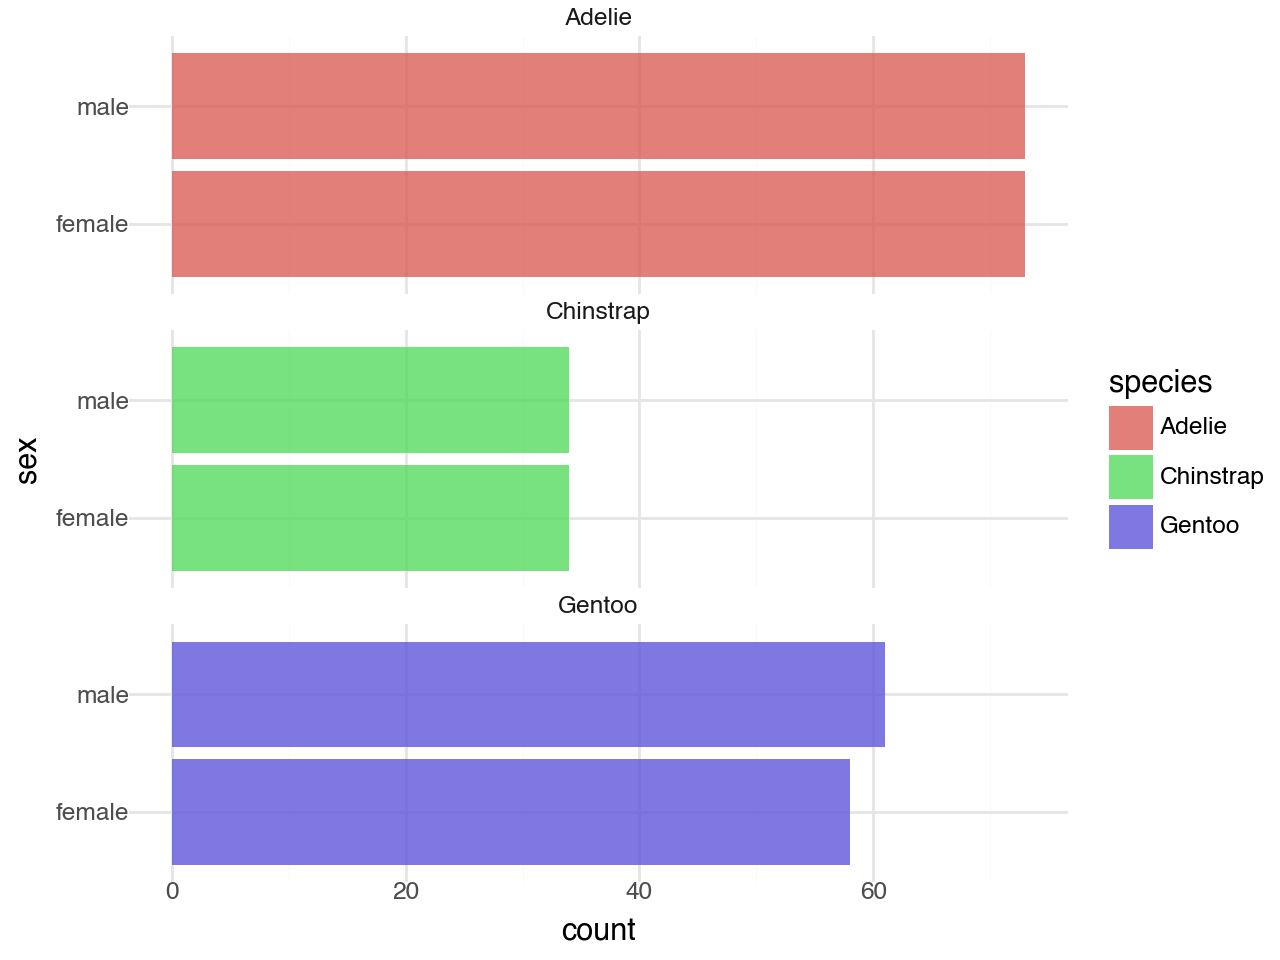

In [10]:
(
  ggplot(penguins, aes(x='sex', fill='species')) +
  geom_bar(alpha = 0.8) +
  theme_minimal() +
  facet_wrap('species', ncol = 1) +
  coord_flip()
)

In [11]:
penguins.filter(regex='_mm', axis='columns')

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0
...,...,...,...
339,55.8,19.8,207.0
340,43.5,18.1,202.0
341,49.6,18.2,193.0
342,50.8,19.0,210.0


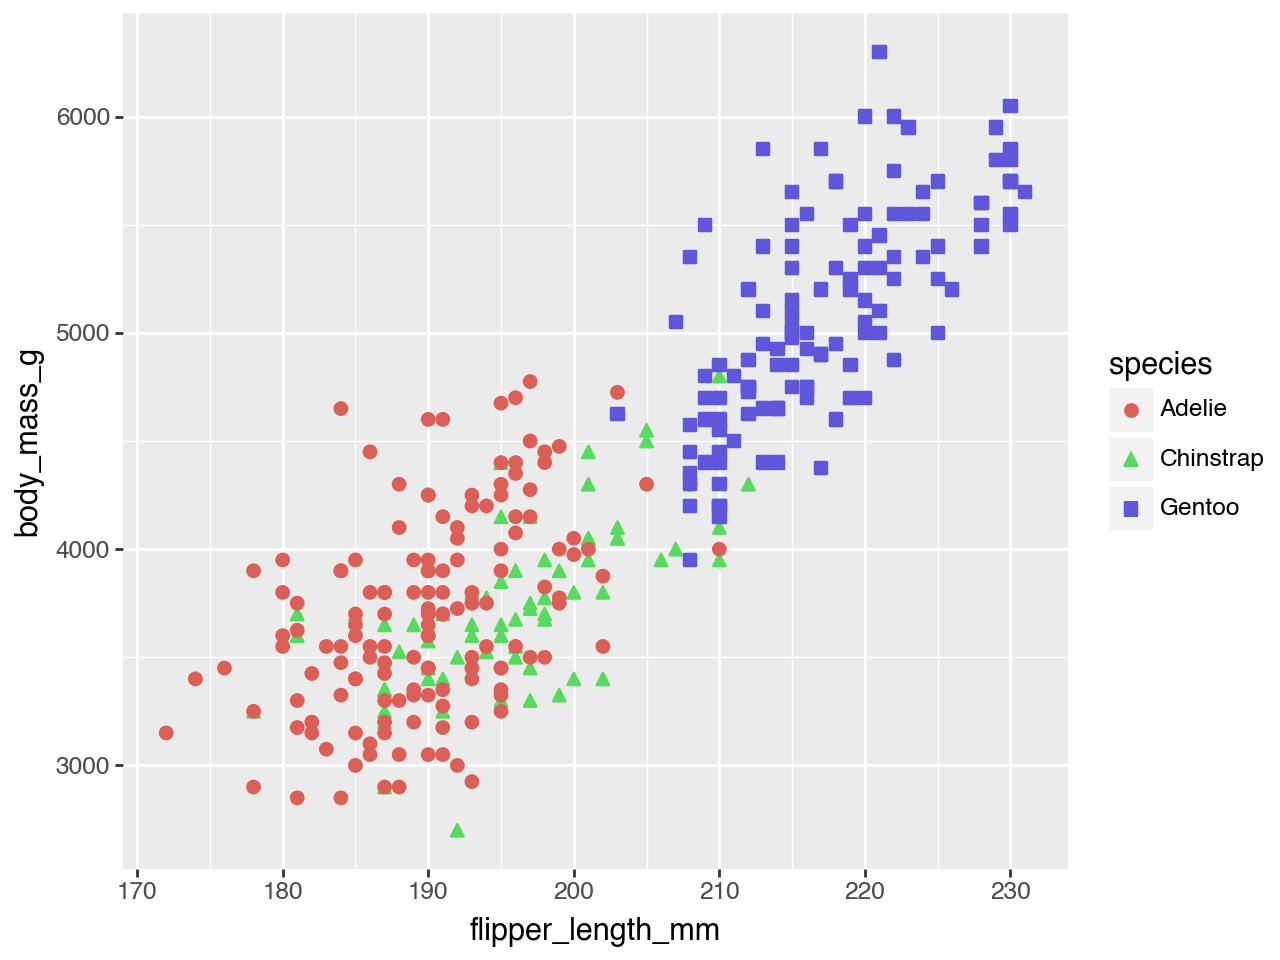

In [12]:
(
  ggplot(penguins, aes(x="flipper_length_mm", y="body_mass_g")) +
  geom_point(aes(color="species", shape="species"), size=2) 
)

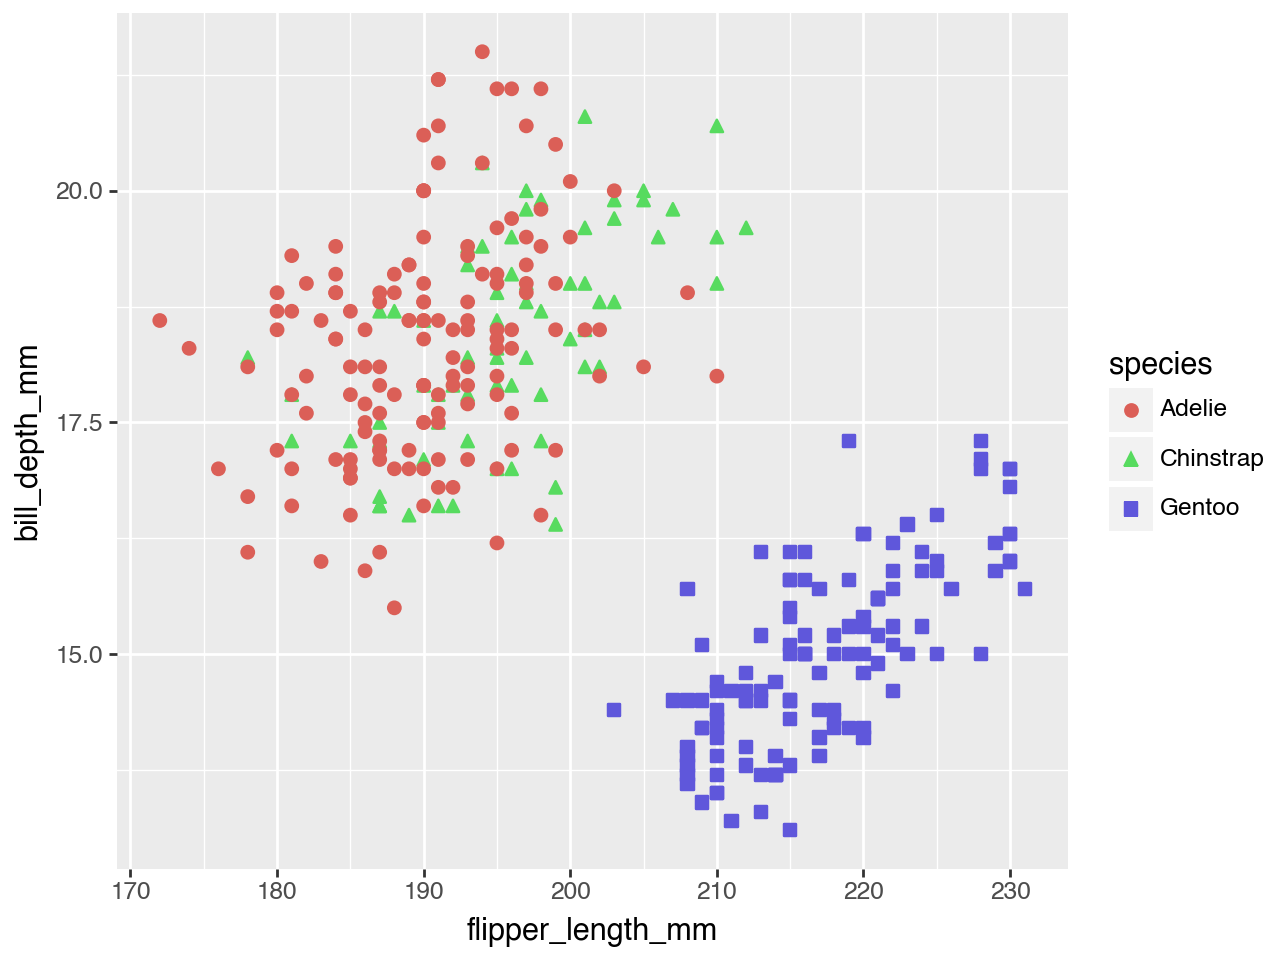

In [13]:
(
  ggplot(penguins, aes(x="flipper_length_mm", y="bill_depth_mm")) +
  geom_point(aes(color="species", shape="species"), size=2)
)

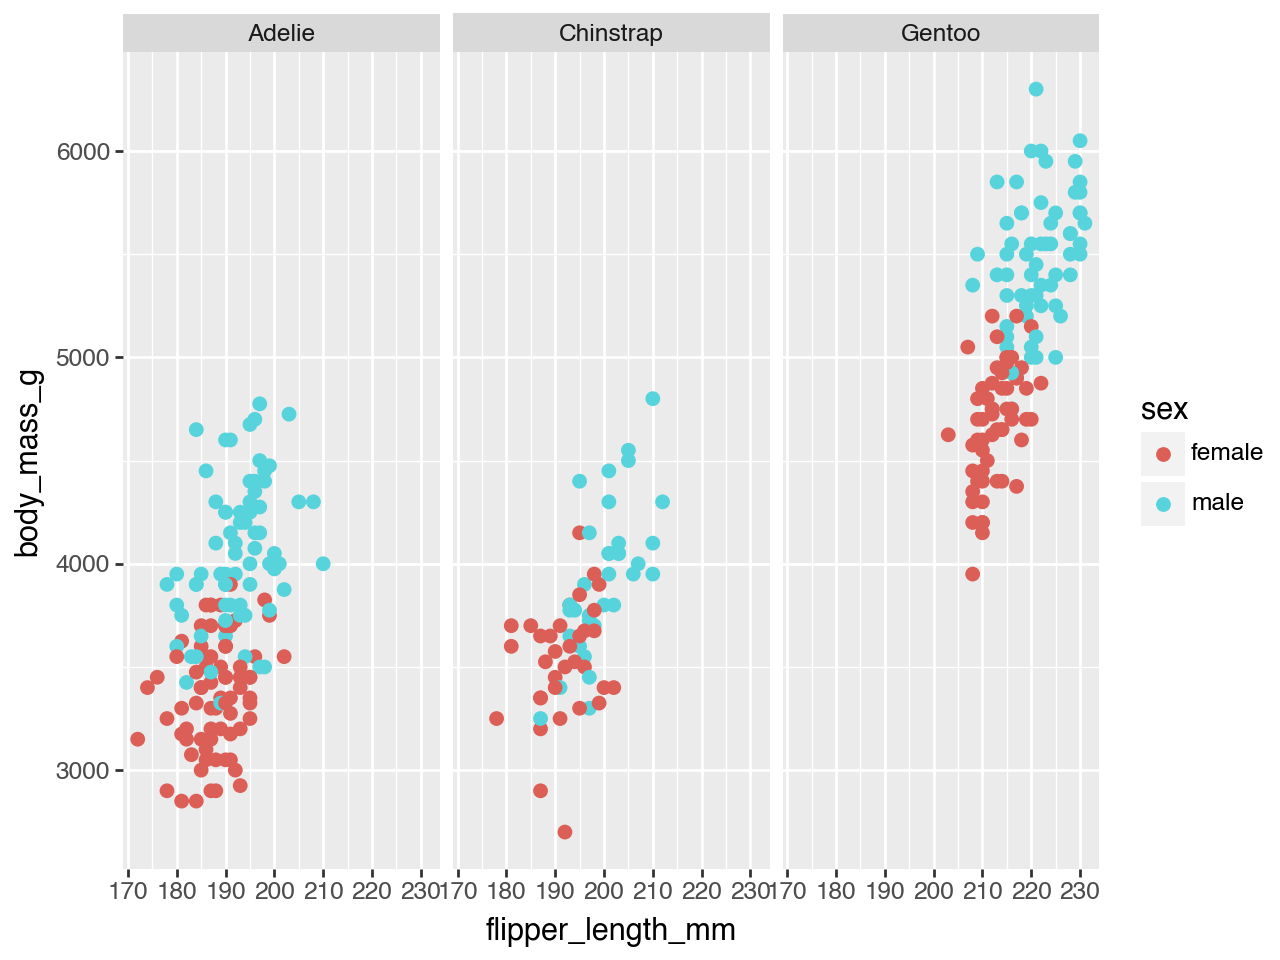

In [14]:
(
  ggplot(penguins, aes(x = "flipper_length_mm", y = "body_mass_g")) +
  geom_point(aes(color = "sex"), size = 2) +
  facet_wrap("species")
)

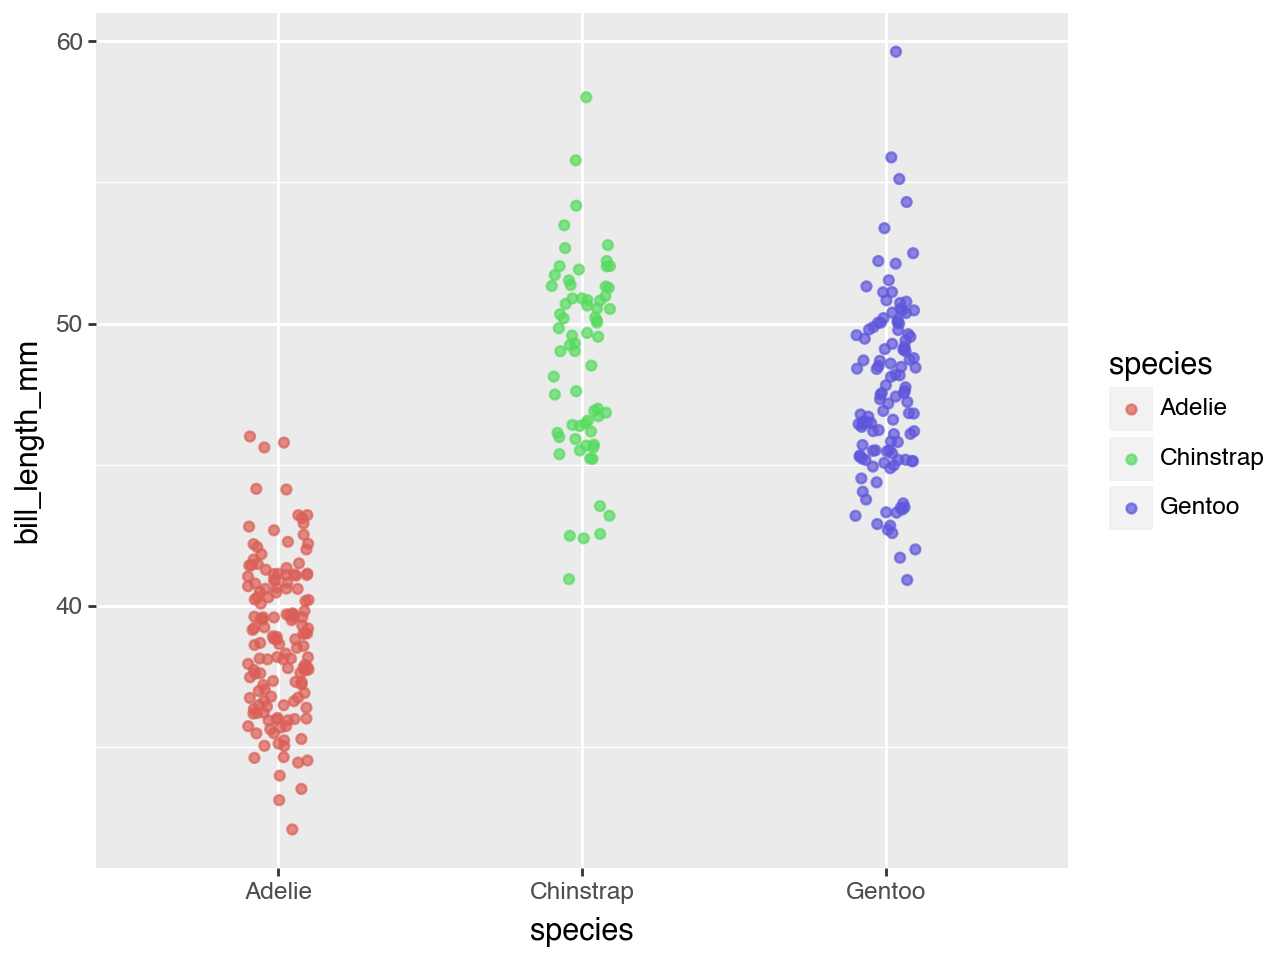

In [15]:
(
  ggplot(penguins, aes(x="species", y="bill_length_mm")) +
  geom_jitter(aes(color="species"), width=0.1, alpha=0.7)
)

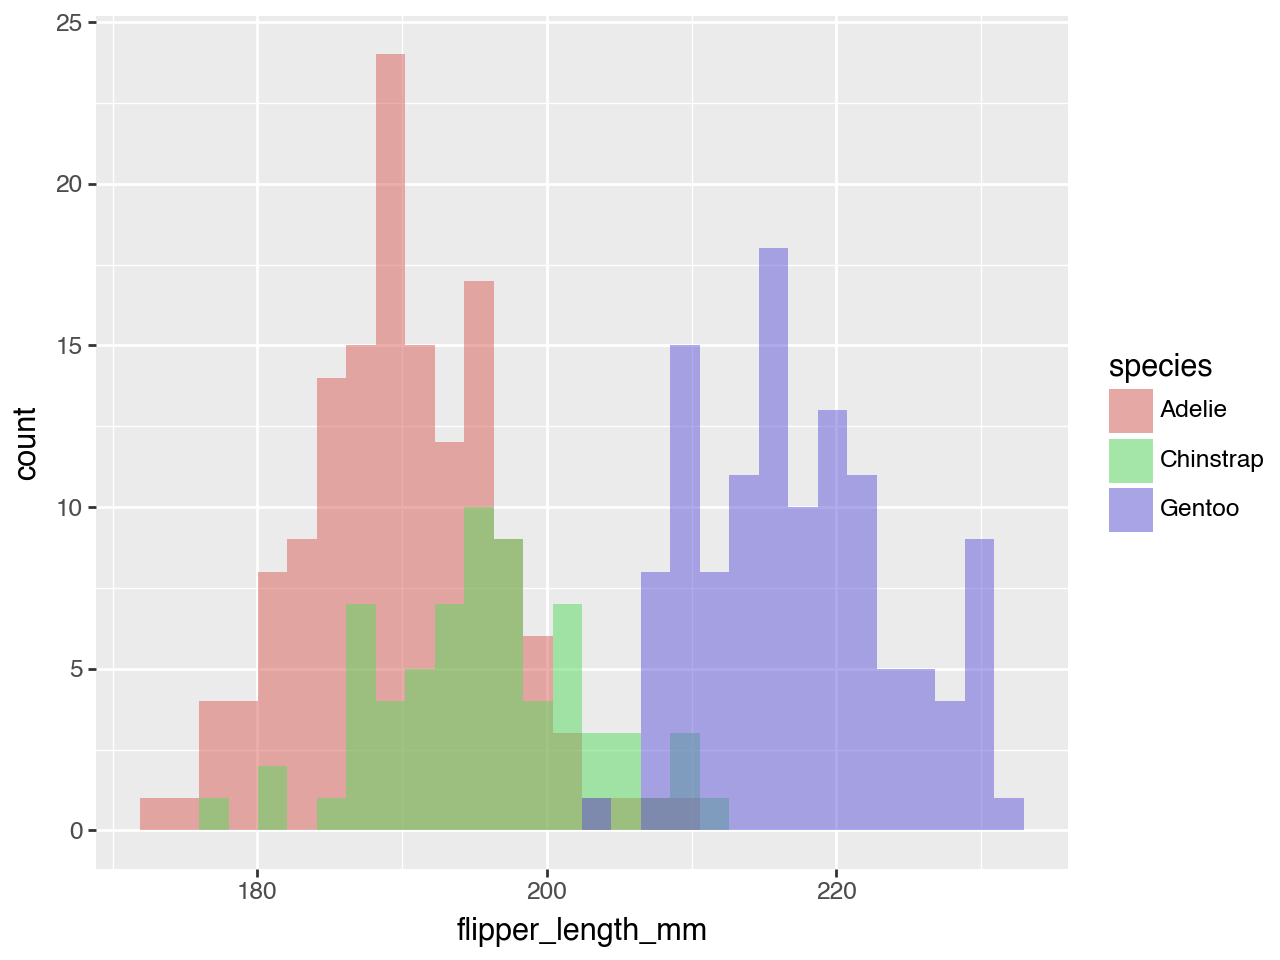

In [16]:
(
  ggplot(penguins, aes(x="flipper_length_mm")) +
  geom_histogram(aes(fill="species"), bins=30, alpha=0.5, position="identity")
)

# Correlations

In [17]:
corr = penguins.select_dtypes('number').corr()

corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.00,-0.23,0.65,0.59,0.03
bill_depth_mm,-0.23,1.00,-0.58,-0.47,-0.05
flipper_length_mm,0.65,-0.58,1.00,0.87,0.15
body_mass_g,0.59,-0.47,0.87,1.00,0.02
year,0.03,-0.05,0.15,0.02,1.00


# References

* Gorman, Tony D. AND Fraser, Kristen B. AND Williams. 2014. “Ecological Sexual Dimorphism and Environmental Variability Within a Community of Antarctic Penguins (Genus Pygoscelis).” PLOS ONE 9 (3): 1–14. https://doi.org/10.1371/journal.pone.0090081.


* Horst, Allison Marie, Alison Presmanes Hill, and Kristen B Gorman. 2020. Palmerpenguins: Palmer Archipelago (Antarctica) Penguin Data. https://doi.org/10.5281/zenodo.3960218.


* Nakhaee, Muhammad Chenariyan. 2021. Palmerpenguins: Palmer Archipelago (Antarctica) Penguin Data. https://github.com/mcnakhaee/palmerpenguins.